In [1]:
import numpy as np

In [2]:
import hgcdte_py as hgcdte

In [3]:
import matplotlib.pyplot as plt

In [4]:
xs = np.array([0.0, 7.0, 7.0001, 9.0, 12.5, 16., 18., 18.0001, 25.])
ys = np.array([0.7, 0.7, 0.1,    0.1,  0.7, 0.1,  0.1,    0.7,     0.7])

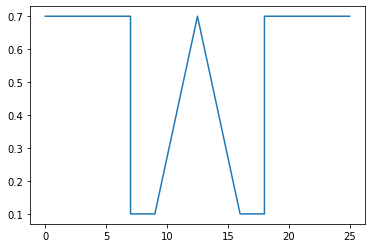

In [5]:
plt.plot(xs, ys)

In [6]:
mod = hgcdte.model(xs, ys)

In [7]:
hcr = hgcdte.hcore(mod, 61)

In [8]:
size = 20
kss = np.linspace(-1., 1., size)

In [9]:
kx, ky = np.meshgrid(np.copy(kss), np.copy(kss))

In [10]:
spec = np.vectorize(lambda x, y: hcr.spectre((x, y)), otypes = [np.ndarray])

In [11]:
eigs = spec(kx, ky)

In [12]:
earr = np.concatenate(np.concatenate(eigs)).reshape(size, size, -1)

In [13]:
earr[0, 0, 366] - earr[0, 0, 364]

1.0847765500414095

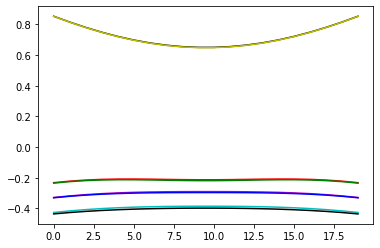

In [14]:
plt.plot(earr[:, 0, 368], 'k-')
plt.plot(earr[:, 0, 366], 'y-')
plt.plot(earr[:, 0, 364], 'r-')
plt.plot(earr[:, 0, 362], 'g-')
plt.plot(earr[:, 0, 360], 'm-')
plt.plot(earr[:, 0, 358], 'b-')
plt.plot(earr[:, 0, 356], 'c-')
plt.plot(earr[:, 0, 354], 'k-')

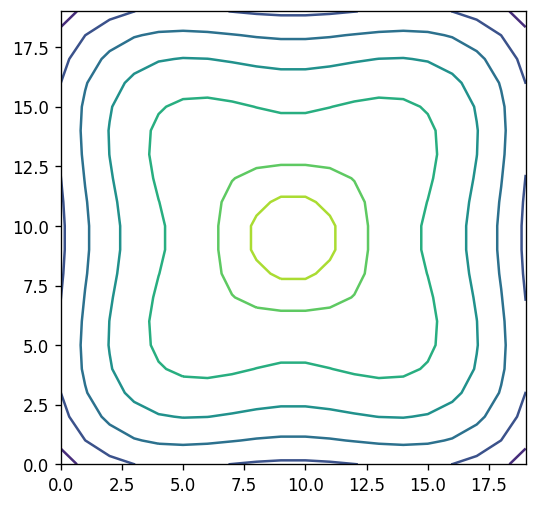

In [15]:
plt.figure(figsize = (5, 5), dpi = 120)
plt.contour(earr[:, :, 364], antialiased = True)

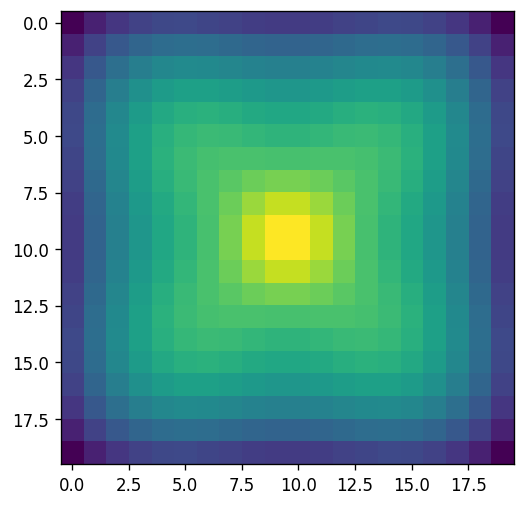

In [16]:
plt.figure(figsize = (5, 5), dpi = 120)
plt.imshow(earr[:, :, 364])

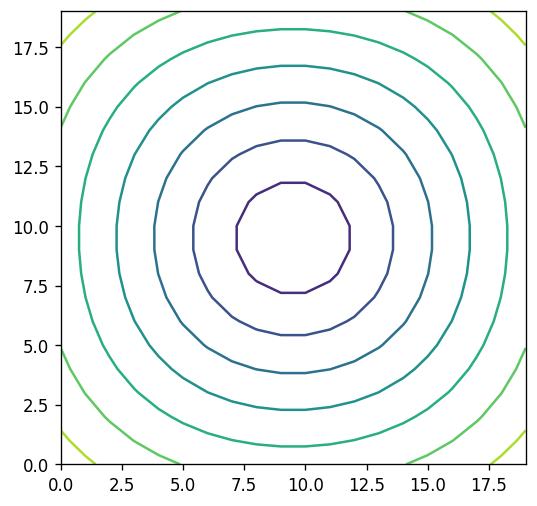

In [17]:
plt.figure(figsize = (5, 5), dpi = 120)
plt.contour(earr[:, :, 366])

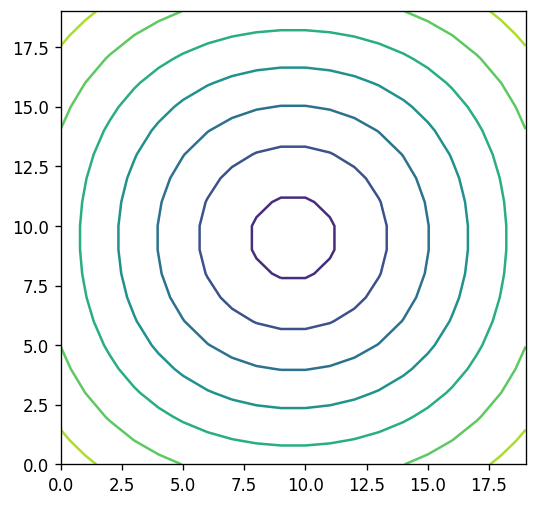

In [18]:
plt.figure(figsize = (5, 5), dpi = 120)
plt.contour(earr[:, :, 368])

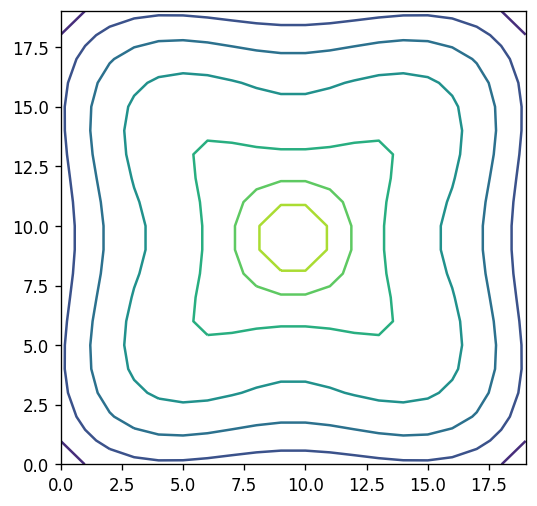

In [19]:
plt.figure(figsize = (5, 5), dpi = 120)
plt.contour(earr[:, :, 362])

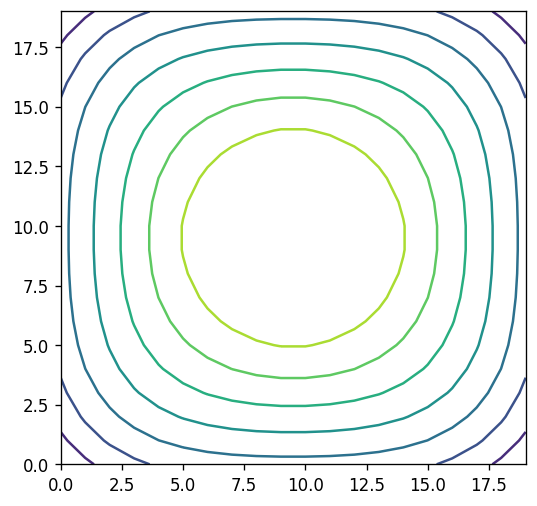

In [20]:
plt.figure(figsize = (5, 5), dpi = 120)
plt.contour(earr[:, :, 360])

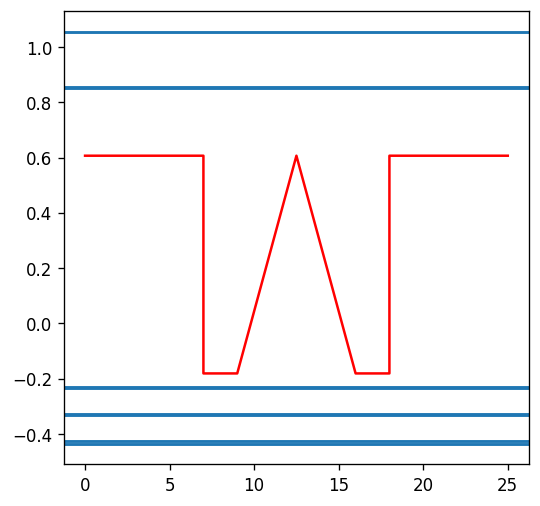

In [21]:
plt.figure(figsize = (5,5), dpi = 120)
plt.plot(xs, 1.036 * ys - 0.303 * (1. - ys) - 0.132 * ys * (1. - ys), 'r-')
#plt.plot(xs, -0.57 * ys, 'g-')
for en in earr[0, 0, 354:372]:
    plt.axhline(y = en)

In [22]:
import h5py

In [20]:
with h5py.File('Disp2D.hdf5', 'w') as f:
    f.create_dataset('2dDisp', data = earr)